# Logistic Regression in C

you will
* explore the sigmoid function (also known as the logistic function)
* explore logistic regression, which uses the sigmoid function

### Sigmoid function or Logistic Function

We can start by using our linesr regression model, $f_{\mathbf{w},b} = \mathbf{w} \cdot \mathbf{x}^{(i)} + b$, to predict $\mathbf{y}$ given $\mathbf{x}$.
* However we would like our prediction to be bewteen $0$ and $1$, since output variable $y$ is either $0$ or $1$.
* THis can be accoplished by using **sigmoid function** which maps all inputs $x$ to values between $0$ and $!$.

Lets implement sigmoid function.

### Formula for sigmoid function

Sigmoid function
* We want output between $0$ and $1$.

$$g(\mathbf{z}) =\frac{1}{1 - e^{-z}}\  0 < g(\mathbf{z}) < 1$$

In the case of logistic regression, z (the input to sigmoid function), is the output of the llinear regression model
* In the case if sigmoid example, $z$ is scalar.
* In the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example.
* The implementation of sigmoid function should cover both of these potential input formats.

Lets implement 
* Numpy has a functon called exp(), which offers a convenient way to calculate the exponential $(e^{z})$ of all elments in the input array $(Z)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# iput is array
in_array=np.array([1,2,3,4,5])
exp_array=np.exp(in_array)
print(f"Input to exp: {in_array}")
print(f"Output of exp: {exp_array}")

#Inout is a single number
in_val=1
exp_val=np.exp(in_val)
print(f"Input to exp: {in_val}")
print(f"Output of exp: {exp_val}")

Input to exp: [1 2 3 4 5]
Output of exp: [  2.71828183   7.3890561   20.08553692  54.59815003 148.4131591 ]
Input to exp: 1
Output of exp: 2.718281828459045


In [3]:
def sigmoid(z):
    """
    Args:
        z (ndarray): A scalar, numpy array of any size.

    returns:
        g (ndarray): sigmoid(z), with the same shape as z
    """
    g = 1/(1 + np.exp(-z))
    return g


In [4]:
# Generate an input array, btn -10 to 10
z_tmp=np.arange(-10,11)

# use sigmoid function
y = sigmoid(z_tmp)

# code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("Input (z), Output (sigmoid(z))")
print(np.c_[z_tmp, y])

Input (z), Output (sigmoid(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


The values from left are **z**, right column are **sigmoid(z)**.

Now lets plot the graph

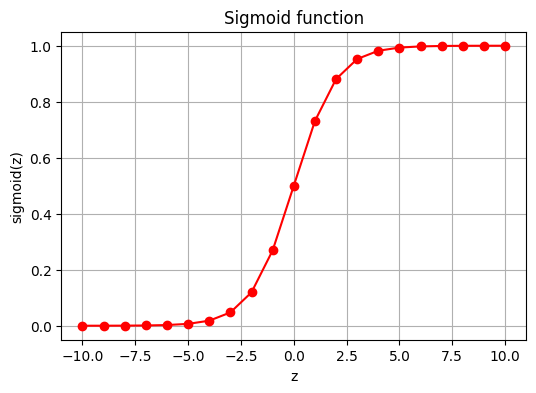

In [5]:
plt.figure(figsize=(6,4))
plt.plot(z_tmp, y, c="r",  marker='o')

plt.title("Sigmoid function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

As you can see, the sigmoid approaches $0$ as $z$ goes to large negative values and approaches $1$ as $z$ goes to large positive values.

### Logistic Regression

A logistic regression model applies the sigmoid to the familiar linear regression model as shown.

$$f_{\mathbf{w},b}(\mathbf{X}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \tag{2}$$

where:
$$g(\mathbf{Z}) = \frac{1}{1 + e^{-z}}$$

so:
$$f_{\vec{w},b}(\mathbf{\vec{X}}) = g(\mathbf{\vec{w}} \cdot \mathbf{\vec{X}} + b) = \frac{1}{1 + e^{-(\mathbf{\vec{w}} \cdot \mathbf{\vec{X}} + b)}}$$

In [6]:
import numpy as np

x_train=np.array([0.,1,2,3,4,5])
y_train=np.array([0,0,0,1,1,1])

w_in=np.zeros(1)
b_in=0

def predict(x, w, b):
    """
    Args:
        x (ndarray (m,)): data, m examples.
        w,b (scalar)    : model parameters.

    returns:
        p (ndarray (m,)): prediction.
    """
    m=x.shape[0]
    n=w.shape[0]
    p=np.zeros(m)
    for i in range(m):
        p[i] = w[n-1]*x[i] + b
    return p

def sigmoid(z):
    """
    Args:
        z (ndarray): A scalar, numpy array of any size.

    returns:
        g (ndarray): sigmoid(z), with the same shape as z
    """
    return 1/(1 + np.exp(-z))


y_pred=predict(x_train, w_in, b_in)
g_y=sigmoid(y_pred)
print(f"prediction: {g_y}")

prediction: [0.5 0.5 0.5 0.5 0.5 0.5]


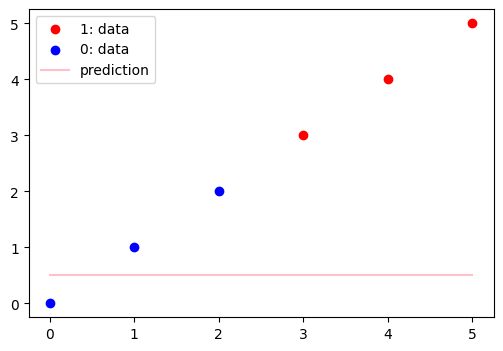

In [7]:
pred=np.full_like(x_train, g_y)

plt.figure(figsize=(6,4))
plt.scatter(x_train[y_train==1], x_train[y_train==1], color='red', label="1: data")
plt.scatter(x_train[y_train==0], x_train[y_train==0], color='blue', label='0: data')
plt.plot(x_train, pred, color='pink', label='prediction')
plt.legend()

#display the plot
plt.show()

### Implementation in C

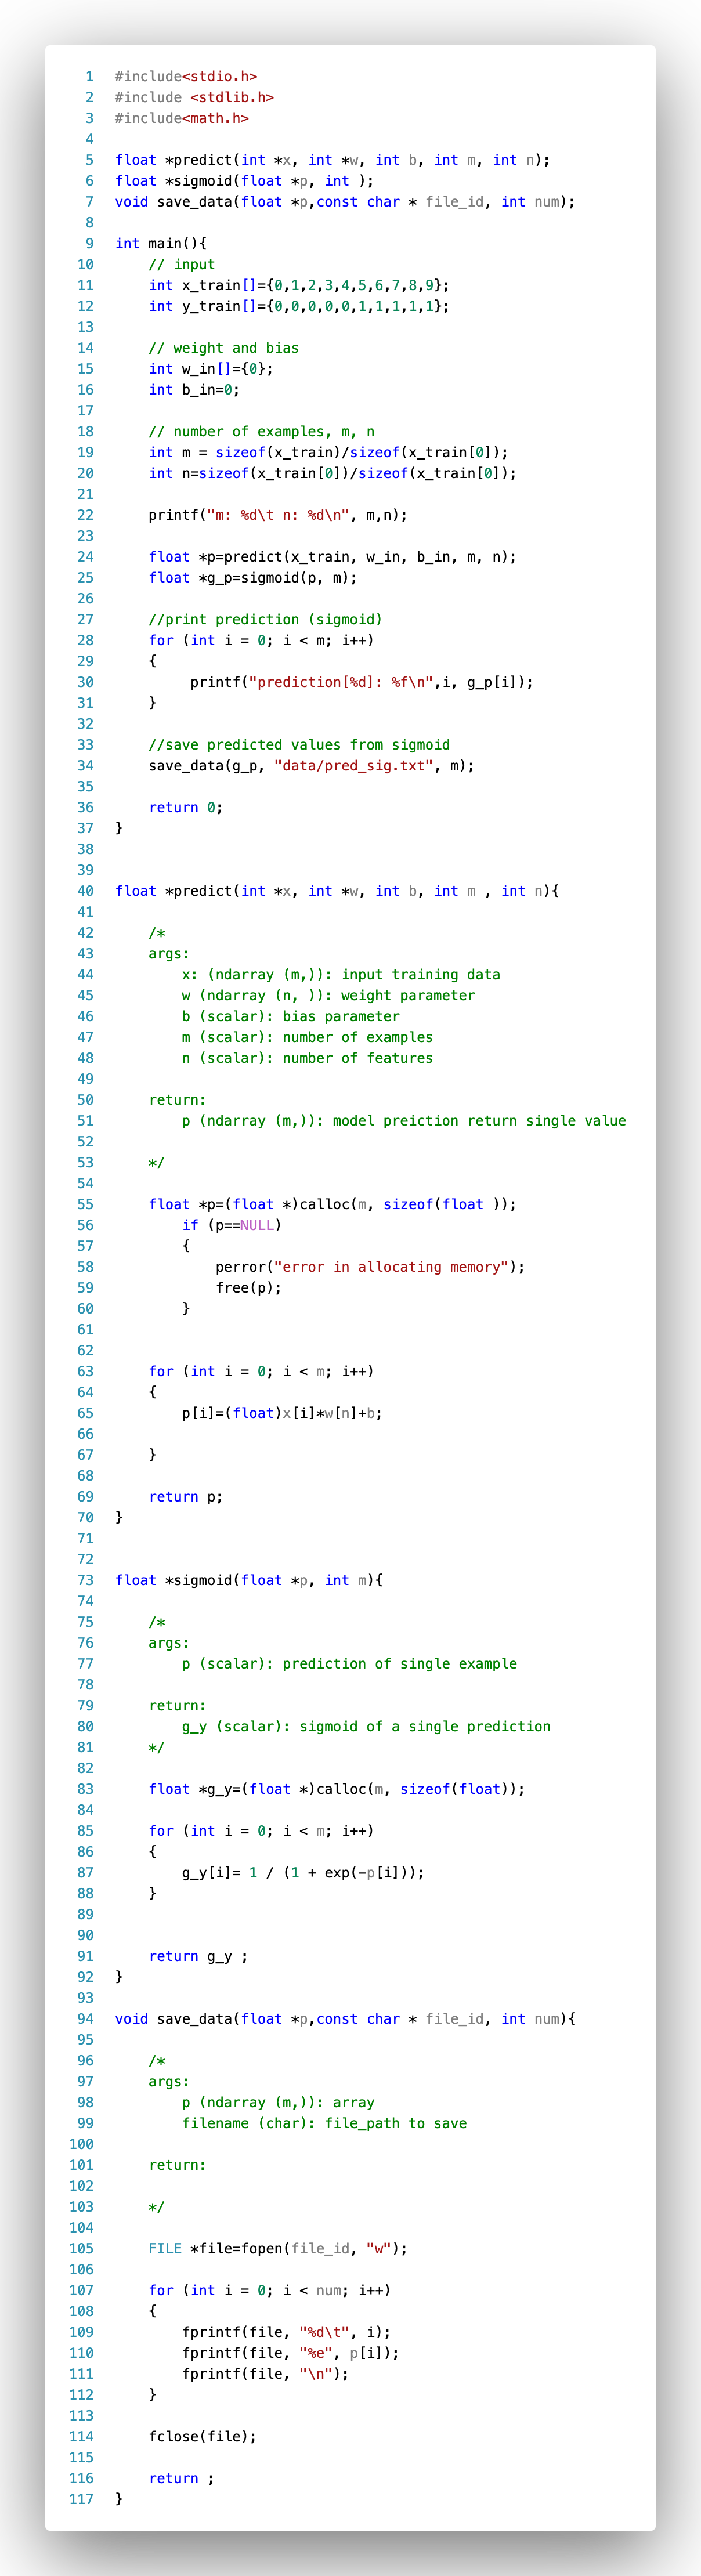


Load saved data from C implementation.

In [35]:

x=np.loadtxt('data/x_train.txt', delimiter=',')
y_pred=np.loadtxt('data/pred_sig.txt', delimiter=',')

print(f"x_train: {x}")
print(f"pred: {y_pred}")

x_train: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
pred: [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
